### Task 1: Data Loading

#### Read the csv file and load into a pandas dataframe

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("Barcelona_listings.csv")

#### Display the first five rows

In [9]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062


#### Display the data types of the columns

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16920 non-null  int64  
 1   name                            16910 non-null  object 
 2   host_id                         16920 non-null  int64  
 3   host_name                       16918 non-null  object 
 4   neighbourhood_group             16920 non-null  object 
 5   neighbourhood                   16920 non-null  object 
 6   latitude                        16920 non-null  float64
 7   longitude                       16920 non-null  float64
 8   room_type                       16920 non-null  object 
 9   price                           16920 non-null  int64  
 10  minimum_nights                  16920 non-null  int64  
 11  number_of_reviews               16920 non-null  int64  
 12  last_review                     

### Task 2a: Data Cleaning

#### Drop Unwanted columns include host id, id, country and country code from dataset

#### Dataset had id, host id and license

In [41]:
df.drop("host_id" , axis="columns" , inplace=True)

In [42]:
df.drop("license" , axis="columns" , inplace=True)

In [43]:
df.drop("id" , axis="columns" , inplace=True)

#### Reason for not including in analytics.
### These columns are not needed because they are stating the Renters AirBnb ID and the Host ID which is not necessary to the data taken. 

In [44]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Habitación muy acogedora.,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9
1,Cozy terrace apartment\nApartamento con patio,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11
4,Huge flat for 8 people close to Sagrada Familia,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9


### Task 2b : Data Cleaning (Python)

#### Check for missing values in Data Frame and display the count in ascending order

In [46]:
df.isna().sum().sort_values()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
host_name                            2
name                                10
last_review                       3614
reviews_per_month                 3614
dtype: int64

#### Check whether there are any duplicate values in dataframe and remove them 

In [47]:
df.duplicated().sum()

0

#### Display total number of records in dataframe after removing duplicates

In [48]:
len(df)

16920

### Task 3 : Data Transformation 

#### Rename column availability 365 to days_booked

In [49]:
df.rename(columns ={"availability_365":"days_booked"})

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,days_booked,number_of_reviews_ltm
0,Habitación muy acogedora.,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9
1,Cozy terrace apartment\nApartamento con patio,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11
4,Huge flat for 8 people close to Sagrada Familia,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.373770,2.117570,Private room,5000,1,30,2019-12-27,0.59,12,0,0
16916,LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.373770,2.117570,Private room,5000,1,2,2019-02-17,0.05,12,0,0
16917,HABITACION PRIVADA DE 6 CAMAS CON TERRAZA PRIVADA,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.374110,2.118520,Private room,5000,1,13,2020-02-19,0.33,12,0,0
16918,"Chillout house, with garden and pool for family",Sven Et Michaela,Les Corts,Pedralbes,41.388440,2.087890,Entire home/apt,250,6,12,2022-07-29,0.19,1,0,2


#### Convert all column names to lowercase and replace the spaces with underscore

In [50]:
df.replace(" " , "_")

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Habitación muy acogedora.,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9
1,Cozy terrace apartment\nApartamento con patio,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11
4,Huge flat for 8 people close to Sagrada Familia,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.373770,2.117570,Private room,5000,1,30,2019-12-27,0.59,12,0,0
16916,LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.373770,2.117570,Private room,5000,1,2,2019-02-17,0.05,12,0,0
16917,HABITACION PRIVADA DE 6 CAMAS CON TERRAZA PRIVADA,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.374110,2.118520,Private room,5000,1,13,2020-02-19,0.33,12,0,0
16918,"Chillout house, with garden and pool for family",Sven Et Michaela,Les Corts,Pedralbes,41.388440,2.087890,Entire home/apt,250,6,12,2022-07-29,0.19,1,0,2


In [51]:
df.rename(columns=str.lower)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Habitación muy acogedora.,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9
1,Cozy terrace apartment\nApartamento con patio,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11
4,Huge flat for 8 people close to Sagrada Familia,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.373770,2.117570,Private room,5000,1,30,2019-12-27,0.59,12,0,0
16916,LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.373770,2.117570,Private room,5000,1,2,2019-02-17,0.05,12,0,0
16917,HABITACION PRIVADA DE 6 CAMAS CON TERRAZA PRIVADA,Casa Barcelo Camp Nou Hostel,Les Corts,la Maternitat i Sant Ramon,41.374110,2.118520,Private room,5000,1,13,2020-02-19,0.33,12,0,0
16918,"Chillout house, with garden and pool for family",Sven Et Michaela,Les Corts,Pedralbes,41.388440,2.087890,Entire home/apt,250,6,12,2022-07-29,0.19,1,0,2


#### Remove dollar sign and comma from the columns price and service fee

### Price and service fee dollar sign and comma's have already been removed from the data set, therefore I have recieved an error message.  


In [33]:
df["price"].str.replace("$" , " ").str.replace("," , " ").astype(float)

AttributeError: Can only use .str accessor with string values!

### Task 4 : Exploratory Data Analysis 

#### List the count of various room types available 

In [58]:
df.room_type.value_counts()

Entire home/apt    10046
Private room        6526
Shared room          176
Hotel room           172
Name: room_type, dtype: int64

#### Which room type adheres to strict cancellation policy

In [59]:
df.head(10)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Habitación muy acogedora.,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9
1,Cozy terrace apartment\nApartamento con patio,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11
4,Huge flat for 8 people close to Sagrada Familia,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9
5,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412910,2.220630,Entire home/apt,230,5,62,2022-07-23,0.44,2,84,10
6,Apart. full equipped. 2 min to Subway lines L1...,Pepa,Sants-Montjuïc,Sants - Badal,41.366400,2.116860,Entire home/apt,86,3,145,2022-09-06,2.15,1,218,34
7,Cozy Studio in Gracia Neighborhood,"M Angeles, Federico",Gràcia,la Vila de Gràcia,41.406610,2.151150,Entire home/apt,31,31,352,2022-09-01,2.69,4,59,6
8,"8 lacus, VICTORIA",Maria,Sants-Montjuïc,Sants - Badal,41.371880,2.122200,Entire home/apt,110,2,10,2022-07-18,1.52,8,106,10
9,Sagrada Familia area - Còrsega 1,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,140,2,74,2022-08-10,0.54,3,287,11


In [61]:
df.pivot_table(
index="number_of_reviews" , 
columns="number_of_reviews_ltm" , 
values ="name",
aggfunc="count"
)

number_of_reviews_ltm,0,1,2,3,4,5,6,7,8,9,...,259,304,314,322,385,388,471,523,565,832
number_of_reviews,,,,,,,,,,,,,,,,,,,,,
0,3608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,658.0,844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,323.0,151.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,227.0,83.0,102.0,334.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,143.0,44.0,54.0,50.0,230.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### List prices by neighborhood group and mention which is the most expensive neighborhood. 

In [62]:
df.price.head()

0     59
1    110
2    386
3    245
4    180
Name: price, dtype: int64

In [66]:
df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)

neighbourhood_group
Horta-Guinardó         252.250569
Les Corts              229.988079
Eixample               212.082045
Sarrià-Sant Gervasi    170.245517
Sants-Montjuïc         155.918453
Sant Martí             150.015244
Ciutat Vella           137.059932
Gràcia                 134.326761
Sant Andreu            110.316667
Nou Barris              66.375661
Name: price, dtype: float64

### Task 5a : Data Visualization 

#### Create horizontal bar chart displaying top 10 most expensive 

<AxesSubplot:>

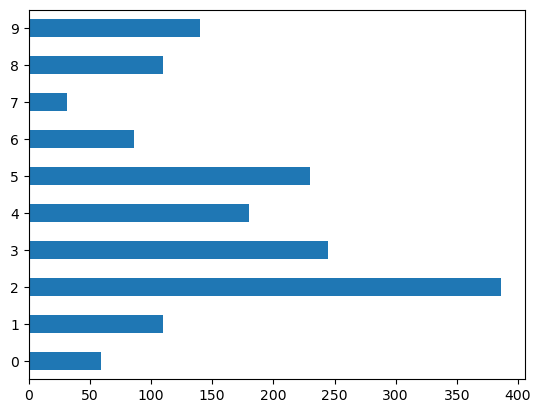

In [13]:
df.head(10).groupby("neighbourhood_group")["price"].head(10).plot(kind="barh")

#### Create another chart with the 10 cheapest neighbourhoods

<AxesSubplot:>

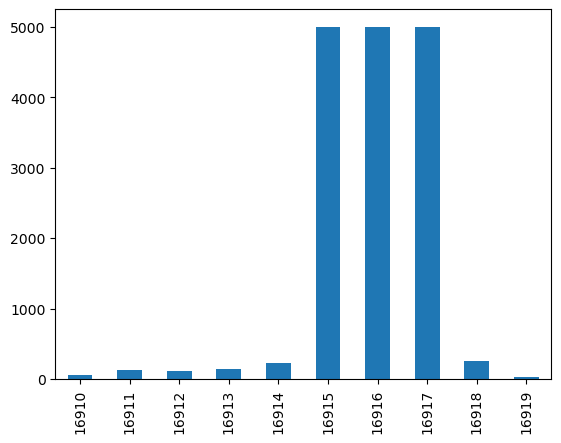

In [73]:
df.tail(10).groupby("neighbourhood_group")["price"].head(10).plot(kind="bar")

#### Create a box and whisker chart for price distribution of listings split by room type. 

<AxesSubplot:title={'center':'price'}, xlabel='[room_type]'>

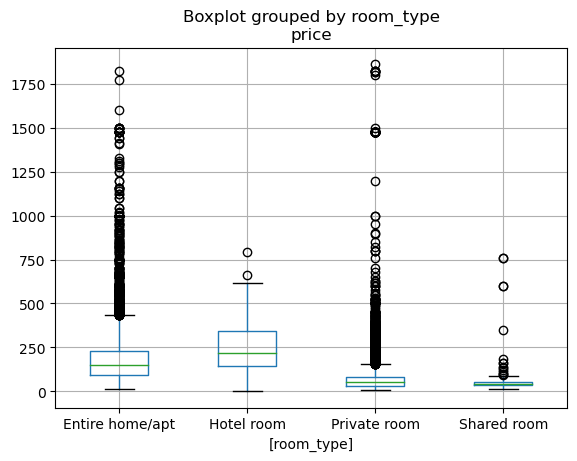

In [10]:
df.loc[(df.price < 2000) , ["price" , "room_type"]].boxplot(by="room_type")

### Task 5b: Data Visualization 

#### Create scatter plot for relationship between cleaning fee and room price

### I have completed plot for price and number of reviews due my dataset not having cleaning fee

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

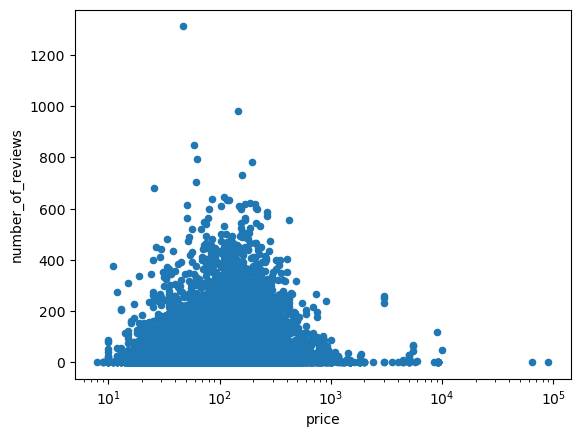

In [12]:
df.plot(kind="scatter" , x="price" , y="number_of_reviews" , logx=True)

### Correlation: The correlation between the price and the number of reviews is the reason this AirBnb has so many good reviews is because the price is good. 

#### Create line chart for the total amount of listings available per year

In [15]:
df["last_review"].head(10)

0    2022-09-08
1    2022-08-26
2    2022-08-12
3    2022-08-10
4    2022-08-29
5    2022-07-23
6    2022-09-06
7    2022-09-01
8    2022-07-18
9    2022-08-10
Name: last_review, dtype: object

In [16]:
pd.to_datetime(df["last_review"]).head(10)

0   2022-09-08
1   2022-08-26
2   2022-08-12
3   2022-08-10
4   2022-08-29
5   2022-07-23
6   2022-09-06
7   2022-09-01
8   2022-07-18
9   2022-08-10
Name: last_review, dtype: datetime64[ns]

In [17]:
pd.to_datetime(df["last_review"]).head(10).dt.year

0    2022
1    2022
2    2022
3    2022
4    2022
5    2022
6    2022
7    2022
8    2022
9    2022
Name: last_review, dtype: int64

In [18]:
df["year"] = pd.to_datetime(df["last_review"]).dt.year

In [19]:
df.groupby("year")["id"].count().head(10)

year
2011.0      1
2012.0      2
2013.0      2
2014.0     16
2015.0     78
2016.0    204
2017.0    317
2018.0    355
2019.0    748
2020.0    645
Name: id, dtype: int64

<AxesSubplot:xlabel='year'>

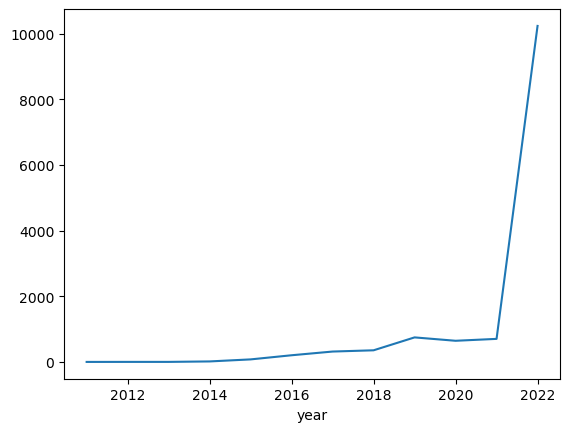

In [21]:
df.groupby("year")["id"].count().plot()

### Task 5c : Data Visualization

#### Create data visualization using one of the reivew columns 

In [22]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt,2022.0
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294,2022.0
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707,2022.0
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325,2022.0
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062,2022.0
5,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412910,2.220630,Entire home/apt,230,5,62,2022-07-23,0.44,2,84,10,HUTB005057,2022.0
6,17039441,Apart. full equipped. 2 min to Subway lines L1...,114340651,Pepa,Sants-Montjuïc,Sants - Badal,41.366400,2.116860,Entire home/apt,86,3,145,2022-09-06,2.15,1,218,34,NaN,2022.0
7,197267,Cozy Studio in Gracia Neighborhood,632830,"M Angeles, Federico",Gràcia,la Vila de Gràcia,41.406610,2.151150,Entire home/apt,31,31,352,2022-09-01,2.69,4,59,6,HUTB01295238,2022.0
8,553559871868002337,"8 lacus, VICTORIA",442972056,Maria,Sants-Montjuïc,Sants - Badal,41.371880,2.122200,Entire home/apt,110,2,10,2022-07-18,1.52,8,106,10,HUTB-009880,2022.0
9,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,140,2,74,2022-08-10,0.54,3,287,11,HUTB-001722,2022.0


### The data that was presented did not depict any host or super host information, therefore, I chose to present the reviews of the AirBnb comparing the number of reviews and reviews per month. 

<AxesSubplot:xlabel='number_of_reviews'>

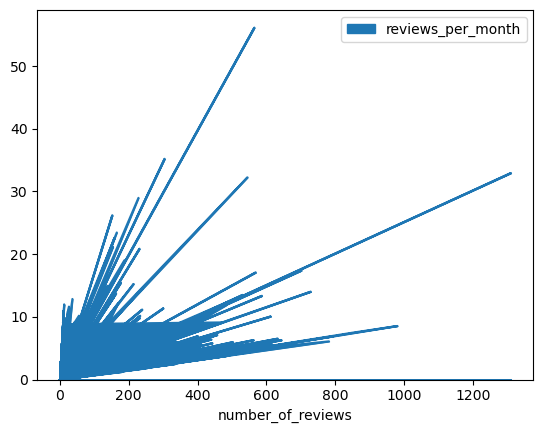

In [29]:
df.plot.area (x="number_of_reviews" , y="reviews_per_month")

#### Create visualization to compare at least 2 different variables between verified & unverified/super host & regular host

### Due to dataset not having super host, I substituted for neighbourhood and reviews per month variables. 

<AxesSubplot:xlabel='room_type'>

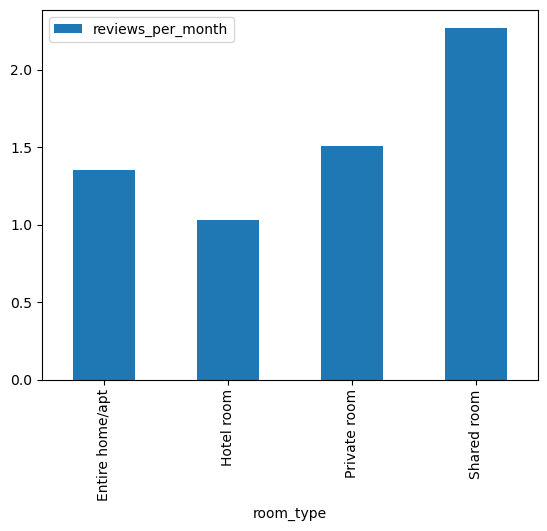

In [24]:
df.groupby("room_type")[["neighbourhood" , "reviews_per_month"]].mean().plot(kind="bar")